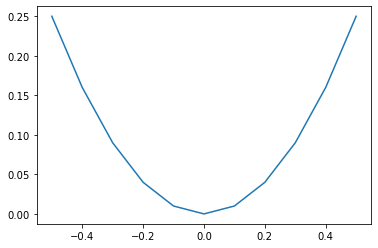

In [1]:
# demonstrate simple x^2 function
from matplotlib import pyplot
# simple function
def calculate(x):
 return x * x
# define inputs
inputs = [-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]
# calculate outputs
outputs = [calculate(x) for x in inputs]
# plot the result
pyplot.plot(inputs, outputs)
pyplot.show()


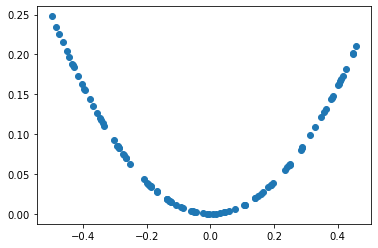

In [3]:
# example of generating random samples from X^2
from numpy.random import rand
from numpy import hstack
from matplotlib import pyplot
# generate randoms sample from x^2
def generate_samples(n=100):
# generate random inputs in [-0.5, 0.5]
 X1 = rand(n) - 0.5
# generate outputs X^2 (quadratic)
 X2 = X1 * X1
# stack arrays
 X1 = X1.reshape(n, 1)
 X2 = X2.reshape(n, 1)
 return hstack((X1, X2))
# generate samples
data = generate_samples()
# plot samples
pyplot.scatter(data[:, 0], data[:, 1])
pyplot.show()


In [4]:
# define the discriminator model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.keras.utils.vis_utils import plot_model
 
# define the standalone discriminator model
def define_discriminator(n_inputs=2):
 model = Sequential()
 model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
 model.add(Dense(1, activation='sigmoid'))
# compile model
 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model
 
# define the discriminator model
model = define_discriminator()
# summarize the model
model.summary()
# plot the mode
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 25)                75        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [22]:
# generate n real samples with class labels
def generate_real_samples(n):
# generate inputs in [-0.5, 0.5]
 X1 = rand(n) - 0.5
# generate outputs X^2
 X2 = X1 * X1
# stack arrays
 X1 = X1.reshape(n, 1)
 X2 = X2.reshape(n, 1)
 X = hstack((X1, X2))
# generate class labels
 y = ones((n, 1))
 return X, y


In [25]:
# generate n fake samples with class labels
def generate_fake_samples(n):
# generate inputs in [-1, 1]
 X1 = -1 + rand(n) * 2
# generate outputs in [-1, 1]
 X2 = -1 + rand(n) * 2
# stack arrays
 X1 = X1.reshape(n, 1)
 X2 = X2.reshape(n, 1)
 X = hstack((X1, X2))
# generate class labels
 y = zeros((n, 1))
 return X, y

In [49]:
# train the discriminator model
def train_discriminator(model, n_epochs=1000, n_batch=128):
 half_batch = int(n_batch / 2)
# run epochs manually
 for i in range(n_epochs):
# generate real examples
  X_real, y_real = generate_real_samples(half_batch)
# update model
  model.train_on_batch(X_real, y_real)
# generate fake examples
  X_fake, y_fake = generate_fake_samples(half_batch)
# update model
  model.train_on_batch(X_fake, y_fake)
# evaluate the model
  _, acc_real = model.evaluate(X_real, y_real, verbose=0)
  _, acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
  print(i, acc_real, acc_fake)


In [48]:
# define and fit a discriminator model
from numpy import zeros
from numpy import ones
from numpy import hstack
from numpy.random import rand
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# define the standalone discriminator model
def define_discriminator(n_inputs=2):
 model = Sequential()
 model.add(Dense(25, activation='relu', kernel_initializer='he_uniform',
 input_dim=n_inputs))
 model.add(Dense(1, activation='sigmoid'))
# compile model
 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model
# generate n real samples with class labels
def generate_real_samples(n):
# generate inputs in [-0.5, 0.5]
 X1 = rand(n) - 0.5
# generate outputs X^2
 X2 = X1 * X1
# stack arrays
 X1 = X1.reshape(n, 1)
 X2 = X2.reshape(n, 1)
 X = hstack((X1, X2))
# generate class labels
 y = ones((n, 1))
 return X, y
# generate n fake samples with class labels
def generate_fake_samples(n):
# generate inputs in [-1, 1]
 X1 = -1 + rand(n) * 2
# generate outputs in [-1, 1]
 X2 = -1 + rand(n) * 2
# stack arrays
 X1 = X1.reshape(n, 1)
 X2 = X2.reshape(n, 1)
 X = hstack((X1, X2))
# generate class labels
 y = zeros((n, 1))
 return X, y
# train the discriminator model
def train_discriminator(model, n_epochs=1000, n_batch=128):
 half_batch = int(n_batch / 2)
# run epochs manually
 for i in range(n_epochs):
# generate real examples
  X_real, y_real = generate_real_samples(half_batch)
# update model
  model.train_on_batch(X_real, y_real)
# generate fake examples
  X_fake, y_fake = generate_fake_samples(half_batch)
# update model
  model.train_on_batch(X_fake, y_fake)
# evaluate the model
  _, acc_real = model.evaluate(X_real, y_real, verbose=0)
  _, acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
  print(i, acc_real, acc_fake)
# define the discriminator model
model = define_discriminator()
# fit the model
train_discriminator(model)

0 0.234375 0.796875
1 0.171875 0.71875
2 0.25 0.828125
3 0.3125 0.765625
4 0.359375 0.8125
5 0.28125 0.796875
6 0.265625 0.84375
7 0.328125 0.796875
8 0.21875 0.8125
9 0.28125 0.796875
10 0.265625 0.875
11 0.28125 0.8125
12 0.1875 0.859375
13 0.265625 0.859375
14 0.203125 0.890625
15 0.28125 0.890625
16 0.234375 0.875
17 0.25 0.875
18 0.1875 0.84375
19 0.265625 0.859375
20 0.28125 0.765625
21 0.265625 0.921875
22 0.234375 0.875
23 0.296875 0.890625
24 0.296875 0.890625
25 0.28125 0.859375
26 0.21875 0.953125
27 0.28125 0.84375
28 0.21875 0.9375
29 0.234375 0.90625
30 0.3125 0.9375
31 0.171875 0.90625
32 0.3125 0.875
33 0.28125 0.84375
34 0.328125 0.890625
35 0.25 0.90625
36 0.28125 0.90625
37 0.34375 0.921875
38 0.3125 0.90625
39 0.3125 0.90625
40 0.328125 0.890625
41 0.3125 0.921875
42 0.265625 0.90625
43 0.234375 0.90625
44 0.34375 0.9375
45 0.375 0.9375
46 0.296875 0.90625
47 0.34375 0.859375
48 0.4375 0.921875
49 0.3125 0.875
50 0.46875 0.953125
51 0.265625 0.9375
52 0.359375 0.953

418 1.0 0.890625
419 1.0 0.84375
420 1.0 0.84375
421 0.96875 0.875
422 1.0 0.9375
423 1.0 0.984375
424 1.0 0.9375
425 1.0 0.890625
426 1.0 0.90625
427 1.0 0.921875
428 1.0 0.921875
429 1.0 0.84375
430 1.0 0.890625
431 1.0 0.953125
432 1.0 0.90625
433 1.0 0.875
434 1.0 0.84375
435 1.0 0.875
436 1.0 0.859375
437 1.0 0.875
438 1.0 0.921875
439 1.0 0.890625
440 1.0 0.890625
441 1.0 0.859375
442 1.0 0.921875
443 1.0 0.90625
444 1.0 0.921875
445 1.0 0.9375
446 1.0 0.90625
447 1.0 0.953125
448 1.0 0.921875
449 1.0 0.84375
450 1.0 0.84375
451 1.0 0.890625
452 1.0 0.90625
453 1.0 0.84375
454 1.0 0.875
455 1.0 0.921875
456 1.0 0.96875
457 1.0 0.984375
458 1.0 0.921875
459 1.0 0.875
460 1.0 0.875
461 1.0 0.953125
462 1.0 0.84375
463 1.0 0.90625
464 1.0 0.921875
465 1.0 0.828125
466 1.0 0.875
467 1.0 0.921875
468 1.0 0.78125
469 1.0 0.890625
470 1.0 0.875
471 1.0 0.921875
472 1.0 0.859375
473 1.0 0.890625
474 1.0 0.828125
475 1.0 0.90625
476 1.0 0.9375
477 1.0 0.90625
478 1.0 0.90625
479 1.0 0.890

930 1.0 0.90625
931 1.0 0.890625
932 1.0 0.84375
933 1.0 0.828125
934 1.0 0.875
935 1.0 0.9375
936 1.0 0.859375
937 1.0 0.890625
938 1.0 0.921875
939 1.0 0.90625
940 1.0 0.828125
941 1.0 0.875
942 1.0 0.90625
943 1.0 0.90625
944 1.0 0.890625
945 1.0 0.90625
946 1.0 0.890625
947 1.0 0.796875
948 1.0 0.921875
949 1.0 0.828125
950 1.0 0.828125
951 1.0 0.890625
952 1.0 0.875
953 1.0 0.9375
954 1.0 0.8125
955 1.0 0.90625
956 1.0 0.890625
957 1.0 0.875
958 1.0 0.9375
959 1.0 0.84375
960 1.0 0.890625
961 1.0 0.921875
962 1.0 0.828125
963 1.0 0.921875
964 1.0 0.890625
965 1.0 0.921875
966 1.0 0.921875
967 1.0 0.875
968 1.0 0.890625
969 1.0 0.90625
970 1.0 0.78125
971 1.0 0.890625
972 1.0 0.921875
973 1.0 0.921875
974 1.0 0.9375
975 1.0 0.90625
976 1.0 0.90625
977 1.0 0.890625
978 1.0 0.875
979 1.0 0.953125
980 1.0 0.953125
981 1.0 0.921875
982 1.0 0.953125
983 1.0 0.890625
984 1.0 0.875
985 1.0 0.90625
986 1.0 0.859375
987 1.0 0.875
988 1.0 0.828125
989 1.0 0.859375
990 1.0 0.84375
991 1.0 0.8

In [52]:
# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
 model = Sequential()
 model.add(Dense(15, activation='relu', kernel_initializer='he_uniform',
  input_dim=latent_dim))
 model.add(Dense(n_outputs, activation='linear'))
 return model

In [13]:
# define the generator model
import tensorflow as tf
import pydotplus
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

#define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
 model = Sequential()
 model.add(Dense(15, activation='relu', kernel_initializer='he_uniform',
  input_dim=latent_dim))
 model.add(Dense(n_outputs, activation='linear'))
 return model
# define the discriminator model
model = define_generator(5)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 15)                90        
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 32        
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [55]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
# generate points in the latent space
 x_input = randn(latent_dim * n)
# reshape into a batch of inputs for the network
 x_input = x_input.reshape(n, latent_dim)
 return x_input


In [57]:
# use the generator to generate n fake examples and plot the results
def generate_fake_samples(generator, latent_dim, n):
# generate points in latent space
 x_input = generate_latent_points(latent_dim, n)
# predict outputs
 X = generator.predict(x_input)
# plot the results
 pyplot.scatter(X[:, 0], X[:, 1])
 pyplot.show()


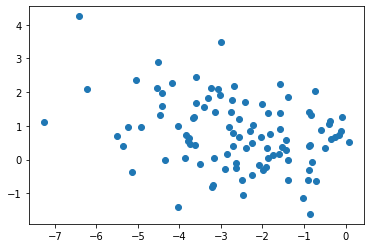

In [58]:
# define and use the generator model
import tensorflow as tf
from numpy.random import randn
from  tensorflow .keras.models import Sequential
from  tensorflow .keras.layers import Dense
from matplotlib import pyplot
# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
 model = Sequential()
 model.add(Dense(15, activation='relu', kernel_initializer='he_uniform',
  input_dim=latent_dim))
 model.add(Dense(n_outputs, activation='linear'))
 return model
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
# generate points in the latent space
 x_input = randn(latent_dim * n)
# reshape into a batch of inputs for the network
 x_input = x_input.reshape(n, latent_dim)
 return x_input
# use the generator to generate n fake examples and plot the results
def generate_fake_samples(generator, latent_dim, n):
# generate points in latent space
 x_input = generate_latent_points(latent_dim, n)
# predict outputs
 X = generator.predict(x_input)
# plot the results
 pyplot.scatter(X[:, 0], X[:, 1])
 pyplot.show()
# size of the latent space
latent_dim = 5
# define the discriminator model
model = define_generator(latent_dim)
# generate and plot generated samples
generate_fake_samples(model, latent_dim, 100)

In [60]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
# make weights in the discriminator not trainable
 discriminator.trainable = False
# connect them
 model = Sequential()
# add generator
 model.add(generator)
# add the discriminator
 model.add(discriminator)
# compile model
 model.compile(loss='binary_crossentropy', optimizer='adam')
 return model

In [9]:
# demonstrate creating the three models in the gan
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.keras.utils.vis_utils  import plot_model
from tensorflow.python.keras.utils.vis_utils import model_to_dot

# define the standalone discriminator model
def define_discriminator(n_inputs=2):
 model = Sequential()
 model.add(Dense(25, activation='relu', kernel_initializer='he_uniform',
 input_dim=n_inputs))
 model.add(Dense(1, activation='sigmoid'))
# compile model
 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model
# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
 model = Sequential()
 model.add(Dense(15, activation='relu', kernel_initializer='he_uniform',
 input_dim=latent_dim))
 model.add(Dense(n_outputs, activation='linear'))
 return model
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
# make weights in the discriminator not trainable
 discriminator.trainable = False
# connect them
 model = Sequential()
# add generator
 model.add(generator)
# add the discriminator
 model.add(discriminator)
# compile model
 model.compile(loss='binary_crossentropy', optimizer='adam')
 return model
# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_11 (Sequential)   (None, 2)                 122       
_________________________________________________________________
sequential_10 (Sequential)   (None, 1)                 101       
Total params: 223
Trainable params: 122
Non-trainable params: 101
_________________________________________________________________
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [7]:
# train the composite model
def train_gan(gan_model, latent_dim, n_epochs=10000, n_batch=128):
# manually enumerate epochs
 for i in range(n_epochs):
# prepare points in latent space as input for the generator
  x_gan = generate_latent_points(latent_dim, n_batch)
# create inverted labels for the fake samples
  y_gan = ones((n_batch, 1))
# update the generator via the discriminator✬s error
  gan_model.train_on_batch(x_gan, y_gan)

In [64]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128):
# determine half the size of one batch, for updating the discriminator
 half_batch = int(n_batch / 2)
# manually enumerate epochs
 for i in range(n_epochs):
# prepare real samples
  x_real, y_real = generate_real_samples(half_batch)
# prepare fake examples
  x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
# update discriminator
  d_model.train_on_batch(x_real, y_real)
  d_model.train_on_batch(x_fake, y_fake)
# prepare points in latent space as input for the generator
  x_gan = generate_latent_points(latent_dim, n_batch)
# create inverted labels for the fake samples
  y_gan = ones((n_batch, 1))
# update the generator via the discriminator✬s error
  gan_model.train_on_batch(x_gan, y_gan)


In [65]:
# generate n real samples with class labels
def generate_real_samples(n):
# generate inputs in [-0.5, 0.5]
 X1 = rand(n) - 0.5
# generate outputs X^2
 X2 = X1 * X1
# stack arrays
 X1 = X1.reshape(n, 1)
 X2 = X2.reshape(n, 1)
 X = hstack((X1, X2))
# generate class labels
 y = ones((n, 1))
 return X, y

In [66]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
# generate points in the latent space
 x_input = randn(latent_dim * n)
# reshape into a batch of inputs for the network
 x_input = x_input.reshape(n, latent_dim)
 return x_input

In [67]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
# generate points in latent space
 x_input = generate_latent_points(latent_dim, n)
# predict outputs
 X = generator.predict(x_input)
# create class labels
 y = zeros((n, 1))
 return X, y

In [68]:
# plot real and fake points
def summarize_performance(generator, latent_dim, n=100):
# prepare real samples
 x_real, y_real = generate_real_samples(n)
# prepare fake examples
 x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
# scatter plot real and fake data points
 pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
 pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
 pyplot.show()


In [69]:
# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
# prepare real samples
 x_real, y_real = generate_real_samples(n)
# evaluate discriminator on real examples
 _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
# prepare fake examples
 x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
# evaluate discriminator on fake examples
 _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
# summarize discriminator performance
 print(epoch, acc_real, acc_fake)
# scatter plot real and fake data points
 pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
 pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
# save plot to file
 filename = 'generated_plot_e%03d.png' % (epoch+1)
 pyplot.savefig(filename)
 pyplot.close()

In [70]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128,
n_eval=2000):
# determine half the size of one batch, for updating the discriminator
 half_batch = int(n_batch / 2)
# manually enumerate epochs
 for i in range(n_epochs):
# prepare real samples
  x_real, y_real = generate_real_samples(half_batch)
# prepare fake examples
  x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
 # update discriminator
  d_model.train_on_batch(x_real, y_real)
  d_model.train_on_batch(x_fake, y_fake)
# prepare points in latent space as input for the generator
  x_gan = generate_latent_points(latent_dim, n_batch)
# create inverted labels for the fake samples
  y_gan = ones((n_batch, 1))
# update the generator via the discriminator✬s error
  gan_model.train_on_batch(x_gan, y_gan)
# evaluate the model every n_eval epochs
  if (i+1) % n_eval == 0:
   summarize_performance(i, g_model, d_model, latent_dim)


In [73]:
# train a generative adversarial network on a one-dimensional function
import tensorflow as tf
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
# define the standalone discriminator model
def define_discriminator(n_inputs=2):
 model = Sequential()
 model.add(Dense(25, activation='relu', kernel_initializer='he_uniform',
   input_dim=n_inputs))
 model.add(Dense(1, activation='sigmoid'))
# compile model
 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model
# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
 model = Sequential()
 model.add(Dense(15, activation='relu', kernel_initializer='he_uniform',
 input_dim=latent_dim))
 model.add(Dense(n_outputs, activation='linear'))
 return model
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
# make weights in the discriminator not trainable
 discriminator.trainable = False
# connect them
 model = Sequential()
# add generator
 model.add(generator)
# add the discriminator
 model.add(discriminator)
# compile model
 model.compile(loss='binary_crossentropy', optimizer='adam')
 return model
# generate n real samples with class labels
def generate_real_samples(n):
# generate inputs in [-0.5, 0.5]
 X1 = rand(n) - 0.5
# generate outputs X^2
 X2 = X1 * X1
# stack arrays
 X1 = X1.reshape(n, 1)
 X2 = X2.reshape(n, 1)
 X = hstack((X1, X2))
# generate class labels
 y = ones((n, 1))
 return X, y
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
# generate points in the latent space
 x_input = randn(latent_dim * n)
# reshape into a batch of inputs for the network
 x_input = x_input.reshape(n, latent_dim)
 return x_input
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
# generate points in latent space
 x_input = generate_latent_points(latent_dim, n)
# predict outputs
 X = generator.predict(x_input)
# create class labels
 y = zeros((n, 1))
 return X, y
# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
# prepare real samples
 x_real, y_real = generate_real_samples(n)
# evaluate discriminator on real examples
 _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
# prepare fake examples
 x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
# evaluate discriminator on fake examples
 _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
# summarize discriminator performance
 print(epoch, acc_real, acc_fake)
    
# scatter plot real and fake data points
 pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
 pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
# save plot to file
 filename = 'generated_plot_e%03d.png' % (epoch+1)
 pyplot.savefig(filename)
 pyplot.close()
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128,
n_eval=2000):
# determine half the size of one batch, for updating the discriminator
 half_batch = int(n_batch / 2)
# manually enumerate epochs
 for i in range(n_epochs):
# prepare real samples
  x_real, y_real = generate_real_samples(half_batch)
# prepare fake examples
  x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
# update discriminator
  d_model.train_on_batch(x_real, y_real)
  d_model.train_on_batch(x_fake, y_fake)
# prepare points in latent space as input for the generator
  x_gan = generate_latent_points(latent_dim, n_batch)
# create inverted labels for the fake samples
  y_gan = ones((n_batch, 1))
# update the generator via the discriminator✬s error
  gan_model.train_on_batch(x_gan, y_gan)
# evaluate the model every n_eval epochs
  if (i+1) % n_eval == 0:
   summarize_performance(i, g_model, d_model, latent_dim)
# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)

1999 0.6399999856948853 0.41999998688697815
3999 0.41999998688697815 0.6100000143051147
5999 0.7599999904632568 0.4399999976158142
7999 0.699999988079071 0.3799999952316284
9999 0.5199999809265137 0.47999998927116394
